In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [41]:
url = "/content/drive/MyDrive/Colab Notebooks/Datasets/panic_disorder_dataset_testing_Pandas.csv"
dataframe = pd.read_csv(url)

dataset = dataframe.drop("Panic Disorder Diagnosis", axis=1)
label = dataframe["Panic Disorder Diagnosis"].copy()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [45]:
def calculate_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

In [46]:
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [47]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= alpha * gradient(theta, X, y)
        J_history.append(calculate_cost(theta, X, y))
    return theta, J_history

In [48]:
alpha = 0.01
num_iters = 10000

In [49]:
theta = np.zeros(X_train_norm.shape[1])

theta, J_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iters)

In [50]:
predictions = sigmoid(np.dot(X_test_norm, theta))
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo sin regularización:", accuracy)

Precisión del modelo sin regularización: 0.95925


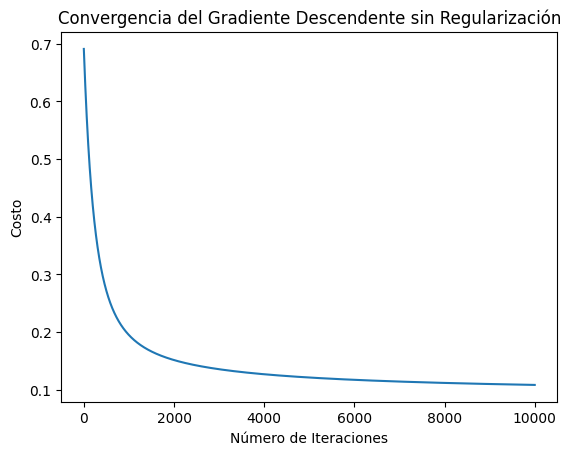

theta calculado por el descenso por el gradiente sin regularización: [-3.94445895  0.01709265  0.03840314  0.29340543  0.30116521  0.61202628
 -0.14509634  0.41881617  0.4674998   0.1316917   0.22006828  0.10040812
  0.08707573  0.09912471 -0.08308614  1.27478444]


In [51]:
pyplot.plot(range(num_iters), J_history)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente sin Regularización')
pyplot.show()
print('theta calculado por el descenso por el gradiente sin regularización: {:s}'.format(str(theta)))

Con regularizacion

In [52]:
def calculate_cost_regularization(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost

In [53]:
def gradient_descent_regularization(X, y, theta, alpha, lambda_, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= (alpha / m) * (np.dot(X.T, (sigmoid(np.dot(X, theta)) - y)) + lambda_ * np.concatenate([[0], theta[1:]]))
        J_history.append(calculate_cost_regularization(theta, X, y, lambda_))
    return theta, J_history

In [54]:
alpha = 0.01
lambda_ = 0.12
num_iters = 1000

In [55]:
theta_reg = np.zeros(X_train_norm.shape[1])

theta_reg, J_history_reg = gradient_descent_regularization(X_train_norm, y_train, theta_reg, alpha, lambda_, num_iters)

In [56]:
predictions_reg = sigmoid(np.dot(X_test_norm, theta_reg))
predictions_reg[predictions_reg >= 0.5] = 1
predictions_reg[predictions_reg < 0.5] = 0
accuracy_reg = np.mean(predictions_reg == y_test)
print("Precisión del modelo con regularización:", accuracy_reg)

Precisión del modelo con regularización: 0.95725


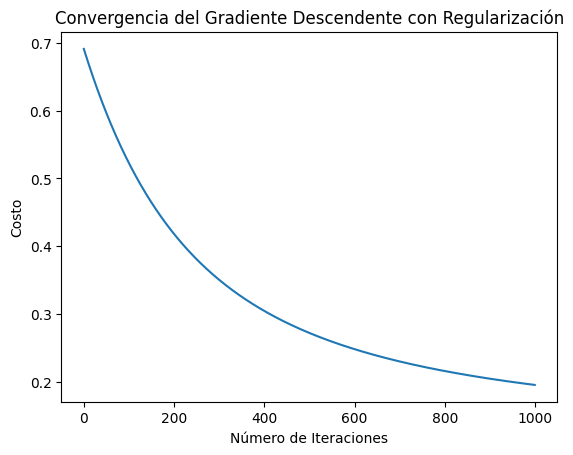

theta calculado por el descenso por el gradiente con regularización: [-1.96281971  0.00426113  0.01044965  0.06939951  0.07434179  0.15800976
 -0.03390864  0.10256748  0.11462434  0.03361595  0.05452274  0.02124144
  0.02312641  0.02256754 -0.01767445  0.27659598]


In [57]:
pyplot.plot(range(num_iters), J_history_reg)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente con Regularización')
pyplot.show()
print('theta calculado por el descenso por el gradiente con regularización: {:s}'.format(str(theta_reg)))

Se observó que los resultados obtenidos fueron similares entre el modelo con y sin regularización.
Se discutieron posibles razones por las cuales la regularización no tuvo un impacto significativo en los resultados, incluyendo la elección de hiperparámetros y la complejidad del modelo y los datos.